### Melchizedek Ackah-Blay


#### Loan Approval Prediction: Data Science Project



##### 28 August 2024 - 3 September 2024

##### **Project Overview** 

###### The aim of this project is to develop a machine learning model to predict loan application approvals by leveraging various application metrics such as credit score, the amount they applied for, etc, I explore the data, engineer relevant features, build and evaluate a predictive model, and provide insights on how to predict whether an applicant will have their loan application approved, what metrics influence loan approval rates the most and how to prevent loan denials based on my analysis 

######

##### **Data Collection and Preparation** 

In [2]:
#importing the necessary libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('ggplot')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.metrics import auc, accuracy_score, roc_curve

In [3]:
#loading the dataset containing transactional and user-relaated features
loan_data = pd.read_csv(r'/Users/melki/Desktop/loan_approval_dataset.csv')

In [4]:
#displaying the top rows to see a glimpse of the overall data
display(loan_data.head(4))

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


In [5]:
#checking the shape of data
loan_data.shape

(4269, 13)

###### *that's a lot of data to work with*

In [6]:
#checking for any null values in the dataset
loan_data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

###### *no missing values, proceed to next step*

In [7]:
#checking the data types of the columns
loan_data.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
#renaming columns since they are a bit off
print(loan_data.columns)

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [9]:
loan_data.rename(columns = {'loan_id':'id',' no_of_dependents':'no_of_dependents', ' education':'education', ' self_employed':'self_employed', ' income_annum':'annual_income', ' loan_amount':'loan_amount', ' loan_term': 'loan_term', ' cibil_score':'credit_score', ' residential_assets_value':'residential_assets_value', ' commercial_assets_value':'commercial_assets_value', ' luxury_assets_value':'luxury_assets_value', ' bank_asset_value':'bank_asset_value', ' loan_status':'status'}, inplace = True)                                                                                            

In [10]:
#dropping id column because it is not a predictor just a name
loan_data.drop(columns = ['id'], inplace = True)

#### routine exploratory data analysis

In [11]:
#what is the proportion of people in different education levels
education_analysis = loan_data['education'].value_counts(normalize = True)
analysis = loan_data['education'].value_counts()
display(education_analysis)

education
 Graduate        0.502225
 Not Graduate    0.497775
Name: proportion, dtype: float64

###### *50.2% are college graduates*
###### *49.8% are did not graduate college*

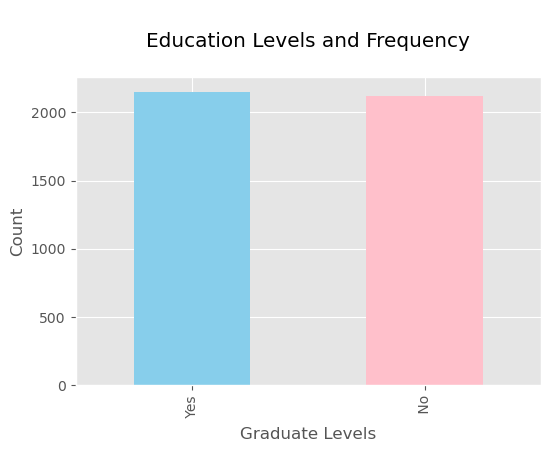

In [100]:
#visualize education levels
plt.figure(figsize = (6,4))
analysis.plot(kind = 'bar', color = ['skyblue', 'pink'])
plt.title('\nEducation Levels and Frequency\n')
plt.xlabel('Graduate Levels')
plt.ylabel('Count')
plt.show()

In [13]:
#uncovering the self-employed distribution
employment_analysis = loan_data['self_employed'].value_counts(normalize = True)
analysis = loan_data['self_employed'].value_counts()
display(employment_analysis)

self_employed
 Yes    0.503631
 No     0.496369
Name: proportion, dtype: float64

###### *50.4% are self employed*
###### *49.6% are not self employed*

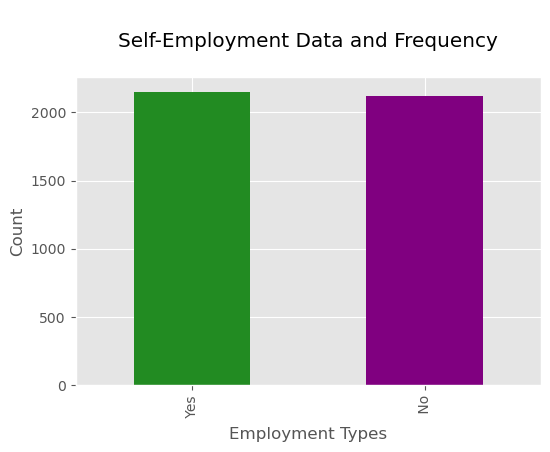

In [99]:
#visualize employment types
plt.figure(figsize = (6,4))
analysis.plot(kind = 'bar', color = ['forestgreen', 'purple'])
plt.title('\nSelf-Employment Data and Frequency\n')
plt.xlabel('Employment Types')
plt.ylabel('Count')
plt.show()

In [15]:
#uncovering the annual income of loan applicants based on if they graduated 
display(loan_data.groupby('education')['annual_income'].mean().sort_values(ascending = False))
display(loan_data.groupby('education')['annual_income'].max())

education
 Graduate        5.091604e+06
 Not Graduate    5.026353e+06
Name: annual_income, dtype: float64

education
 Graduate        9900000
 Not Graduate    9900000
Name: annual_income, dtype: int64

###### *Graduates on average make $65,251 more than non-graduates*

In [16]:
#uncovering the annual income of loan applicants based on if they are self-enployed 
display(loan_data.groupby('self_employed')['annual_income'].mean().sort_values(ascending = False))
display(loan_data.groupby('self_employed')['annual_income'].max())

self_employed
 Yes    5.065721e+06
 No     5.052430e+06
Name: annual_income, dtype: float64

self_employed
 No     9900000
 Yes    9900000
Name: annual_income, dtype: int64

###### *Self-employed applicants make more money on average*

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


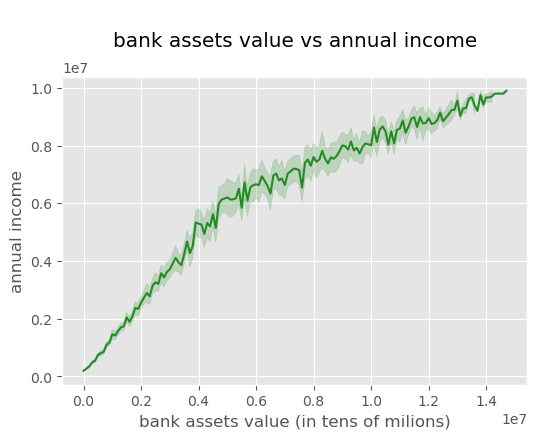

In [98]:
#analyzing the relationship between credit score and annual income
plt.figure(figsize = (6,4))
sns.lineplot(x = loan_data['bank_asset_value'], y = loan_data['annual_income'], color = 'forestgreen')
plt.xlabel('bank assets value (in tens of milions)')
plt.ylabel('annual income')
plt.title('\nbank assets value vs annual income\n')
plt.show()

###### *generally loan applicants will larger bank assets make more money*

##### turning the categorical columns to numerical to be able to work with them

In [18]:
loan_data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'annual_income',
       'loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'status'],
      dtype='object')

In [19]:
encoder = LabelEncoder()

In [20]:
display(loan_data.head(4))

,no_of_dependents,education,self_employed,annual_income,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected


In [21]:
loan_data.dtypes

no_of_dependents             int64
education                   object
self_employed               object
annual_income                int64
loan_amount                  int64
loan_term                    int64
credit_score                 int64
residential_assets_value     int64
commercial_assets_value      int64
luxury_assets_value          int64
bank_asset_value             int64
status                      object
dtype: object

In [22]:
#encoding my to-be x columns
loan_data['self_employed_encoded'] = encoder.fit_transform(loan_data['self_employed'])
loan_data['education_encoded'] = encoder.fit_transform(loan_data['education'])

##### since it is a logistic-regression related problem, i need a y that is binary. i will demarcate the boundary for fail and pass

In [23]:
#looking at the unique values in the grades
loan_data['status'].unique()

array([' Approved', ' Rejected'], dtype=object)

In [24]:
#setting the demarcation
loan_data['status'] = [1 if value == ' Approved' else 0 for value in loan_data['status']]

In [25]:
#verifying
loan_data['status'].unique()

array([1, 0])

In [26]:
#removing the original columns that were encoded
loan_data.drop(columns = ['self_employed', 'education'], inplace = True)                                                                                         

In [27]:
#setting up X and y
x = loan_data.drop(['status'], axis = 1)
y = loan_data['status']


#### Feature Selection


##### to make predictions faster and easier, I will only use feature selection to extract 8 x values that have the best relationships with y

##### feature selection helps to improve model performance, reduce overfittting, and enhance generalizations

##### the type feature selection I will use is SelectKBest

In [28]:
#import SelectKbest
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func = f_classif, k = 6)
x_selected = selector.fit_transform(x,y)

In [29]:
#confirming our x_selected works
x_selected.shape

(4269, 6)

In [30]:
#verifying which columns were selected
selected_features_mask = selector.get_support()

# getting the column names
selected_columns = x.columns[selected_features_mask]

display(f"Selected columns: {selected_columns}")


"Selected columns: Index(['no_of_dependents', 'annual_income', 'loan_amount', 'loan_term',\n       'credit_score', 'luxury_assets_value'],\n      dtype='object')"

##### *so the classification factors that would best help predict loan approval:*
#####           - number of dependents 
#####           - loan amount
#####           - loan term
#####           - credit score
#####           - luxury assets value
#####           - annual income

In [31]:
# splitting x_selected and y into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_selected, y, test_size = 0.3, random_state = 1)

####
#### training with logistic regression
####

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
logistic_regression_model = LogisticRegression()

In [34]:
#training the model
logistic_regression_model.fit(x_train, y_train)

LogisticRegression()

In [35]:
#making predictions
logistic_regression_prediction = logistic_regression_model.predict(x_test)
logistic_regression_proba = logistic_regression_model.predict_proba(x_test)[:,1]

In [36]:
logistic_regression_accuracy = accuracy_score(y_test, logistic_regression_prediction)

In [37]:
logistic_regression_fpr, logistic_regression_tpr, logistic_regression_thresholds = roc_curve(y_test, logistic_regression_proba)
logistic_regression_auc_score = auc(logistic_regression_fpr, logistic_regression_tpr)

##### *outputting the AUC and Accuracy scores*

In [38]:
print(f'AUC Score of Logistic Regression Model: {round(logistic_regression_auc_score,2)}')
print(f'Accuracy Score of Logistic Regression Model: {round(logistic_regression_accuracy,2)}')

AUC Score of Logistic Regression Model: 0.51
Accuracy Score of Logistic Regression Model: 0.62


####
#### training with decision tree classifier
####

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
decision_tree_model = DecisionTreeClassifier()

In [41]:
#training the model
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [42]:
#making predictions
decision_tree_prediction = decision_tree_model.predict(x_test)
decision_tree_proba = decision_tree_model.predict_proba(x_test)[:,1]

In [43]:
decision_tree_accuracy = accuracy_score(y_test, decision_tree_prediction)

In [44]:
decision_tree_fpr, decision_tree_tpr, decision_tree_thresholds = roc_curve(y_test, decision_tree_proba)
decision_tree_auc_score = auc(decision_tree_fpr, decision_tree_tpr)

##### *outputting the AUC and Accuracy scores*

In [45]:
print(f'AUC Score of Decision Tree Model: {decision_tree_auc_score}')
print(f'Accuracy Score of Decision Tree Model: {decision_tree_accuracy}')

AUC Score of Decision Tree Model: 0.9856706984853437
Accuracy Score of Decision Tree Model: 0.9867291178766588


##### *checking for overfitting*

In [46]:
print(f'R-squared for train data is {round((decision_tree_model.score(x_train, y_train)),2)}')
print(f'R-squared for test data is {round((decision_tree_model.score(x_test, y_test)),2)}')

R-squared for train data is 1.0
R-squared for test data is 0.99


##### *prunning the decision tree model*

In [47]:
from sklearn.model_selection import cross_val_score

# Limit the depth of the tree to prevent overfitting
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train, y_train)

# Cross-validation score to check model generalization
cv_scores = cross_val_score(dt, x_train, y_train, cv=10)
print("Cross-validation score: ", round(cv_scores.mean(),4))

# Evaluate on test data
train_score = dt.score(x_train, y_train)
test_score = dt.score(x_test, y_test)

print("Training score: ", round(train_score,4))
print("Test score: ", round(test_score,4))


Cross-validation score:  0.9709
Training score:  0.9749
Test score:  0.9672


In [48]:
#finding the accuracy
dt_pred = dt.predict(x_test)
dt_proba = dt.predict_proba(x_test)[:,1]
dt_accuracy = accuracy_score(y_test, dt_pred)

#find true positive rate, false positive rate and thresholds
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_proba)
dt_auc_score = auc(decision_tree_fpr, decision_tree_tpr)

#oupting them 
print(f'AUC Score of Prunned Decision Tree Model: {dt_auc_score}')
print(f'Accuracy Score of Prunned Decision Tree Model: {dt_accuracy}')

AUC Score of Prunned Decision Tree Model: 0.9856706984853437
Accuracy Score of Prunned Decision Tree Model: 0.9672131147540983


####
#### training with Support Vector Machine classifier
####

In [49]:
from sklearn.svm import SVC

In [50]:
support_vector_model = SVC(C = 0.8, probability = True, random_state = 2)

In [51]:
#training the model
support_vector_model.fit(x_train, y_train)

SVC(C=0.8, probability=True, random_state=2)

In [52]:
#making predictions
support_vector_prediction = support_vector_model.predict(x_test)
support_vector_proba = support_vector_model.predict_proba(x_test)[:,1]

In [53]:
support_vector_accuracy = accuracy_score(y_test, support_vector_prediction)

In [54]:
support_vector_fpr, support_vector_tpr, support_vector_thresholds = roc_curve(y_test, support_vector_proba)
support_vector_auc_score = auc(support_vector_fpr, support_vector_tpr)

##### *outputting the AUC and Accuracy scores*

In [55]:
print(f'AUC Score of Support Vector Machine Model: {round(support_vector_auc_score,2)}')
print(f'Accuracy Score of Support Vector Machine Model: {round(support_vector_accuracy,2)}')

AUC Score of Support Vector Machine Model: 0.52
Accuracy Score of Support Vector Machine Model: 0.62


####
#### training with K-Nearest Neighbor classifier
####

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
knn_model = KNeighborsClassifier(n_jobs =1 , n_neighbors = 6)

In [58]:
#training the model
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_jobs=1, n_neighbors=6)

In [59]:
#making predictions
knn_prediction = knn_model.predict(x_test)
knn_proba = knn_model.predict_proba(x_test)[:,1]

In [60]:
knn_accuracy = accuracy_score(y_test, knn_prediction)

In [61]:
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_proba)
knn_auc_score = auc(knn_fpr, knn_tpr)

##### *outputting the AUC and Accuracy scores*

In [62]:
print(f'AUC Score of K-Nearest Neighbor Model: {round(knn_auc_score,2)}')
print(f'Accuracy Score of K-Nearest Neighbor Model: {round(knn_accuracy,2)}')

AUC Score of K-Nearest Neighbor Model: 0.55
Accuracy Score of K-Nearest Neighbor Model: 0.55


####
#### training with Random Forest Classifier
####

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf_model = RandomForestClassifier(n_estimators = 120, n_jobs = 1, random_state = 3)

In [65]:
#training the model
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=120, n_jobs=1, random_state=3)

In [66]:
#making predictions
rf_prediction = rf_model.predict(x_test)
rf_proba = rf_model.predict_proba(x_test)[:,1]

In [67]:
rf_accuracy = accuracy_score(y_test, rf_prediction)

In [68]:
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_proba)
rf_auc_score = auc(rf_fpr, rf_tpr)

##### *outputting the AUC and Accuracy scores*`

In [69]:
print(f'AUC Score of Random Forest Model: {rf_auc_score}')
print(f'Accuracy Score of Random Forest Model: {rf_accuracy}')

AUC Score of Random Forest Model: 0.9969112740443241
Accuracy Score of Random Forest Model: 0.9828259172521467


####
#### training with AdaBoost Classifier
####

In [70]:
from sklearn.ensemble import AdaBoostClassifier

In [71]:
adc = AdaBoostClassifier(estimator = rf_model, learning_rate = 1.05, n_estimators = 70, random_state = 4)

In [72]:
#training the model
adc.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=120, n_jobs=1,
                                                    random_state=3),
                   learning_rate=1.05, n_estimators=70, random_state=4)

In [73]:
#making predictions
adc_prediction = adc.predict(x_test)
adc_proba = adc.predict_proba(x_test)[:,1]

In [74]:
adc_accuracy = accuracy_score(y_test, adc_prediction)

In [75]:
adc_fpr, adc_tpr, adc_thresholds = roc_curve(y_test, adc_proba)
adc_auc_score = auc(adc_fpr, adc_tpr)

##### *outputting the AUC and Accuracy scores*`

In [118]:
print(f'AUC Score of AdaBoost Model: {adc_auc_score}')
print(f'Accuracy Score of AdaBoost Model: {adc_accuracy}')

AUC Score of AdaBoost Model: 0.9977622627998568
Accuracy Score of AdaBoost Model: 0.9797033567525371


####
#### training with XGC Classifier
####

In [77]:
from xgboost import XGBClassifier

In [78]:
xgc = XGBClassifier(n_estimators = 180, n_jobs = 1, random_state = 5)

In [79]:
#training the model
xgc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=1,
              num_parallel_tree=None, random_state=5, ...)

In [80]:
#making predictions
xgc_prediction = xgc.predict(x_test)
xgc_proba = xgc.predict_proba(x_test)[:,1]

In [81]:
xgc_accuracy = accuracy_score(y_test, xgc_prediction)

In [82]:
xgc_fpr, xgc_tpr, xgc_thresholds = roc_curve(y_test, xgc_proba)
xgc_auc_score = auc(xgc_fpr, xgc_tpr)

##### *outputting the AUC and Accuracy scores*`

In [83]:
print(f'AUC Score of XGBoost Classifier Model: {xgc_auc_score}')
print(f'Accuracy Score of XGBoost Classifier Model: {xgc_accuracy}')

AUC Score of XGBoost Classifier Model: 0.9971227239942506
Accuracy Score of XGBoost Classifier Model: 0.985167837626854


####
#### training with Gradient Boosting Classifier
####

In [84]:
from sklearn.ensemble import GradientBoostingClassifier

In [85]:
gbc = GradientBoostingClassifier(learning_rate = 1.5, n_estimators = 100, random_state = 6)

In [86]:
#training the model
gbc.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=1.5, random_state=6)

In [87]:
#making predictions
gbc_prediction = gbc.predict(x_test)
gbc_proba = gbc.predict_proba(x_test)[:,1]

In [88]:
gbc_accuracy = accuracy_score(y_test, gbc_prediction)

In [89]:
gbc_fpr, gbc_tpr, gbc_thresholds = roc_curve(y_test, gbc_proba)
gbc_auc_score = auc(gbc_fpr, gbc_tpr)

##### *outputting the AUC and Accuracy scores*`

In [90]:
print(f'AUC Score of Gradient Boosting Classifier Model: {gbc_auc_score}')
print(f'Accuracy Score of Gradient Boosting Classifier Model: {gbc_accuracy}')

AUC Score of Gradient Boosting Classifier Model: 0.9827026157526322
Accuracy Score of Gradient Boosting Classifier Model: 0.9734582357533177


####
#### evaluating the models rigorously using cross-validation
####

In [91]:
gbc_cv_scores = cross_val_score(gbc, x, y, cv=10, scoring='roc_auc')
gbc_cv_mean = gbc_cv_scores.mean()

In [92]:
abc_cv_scores = cross_val_score(adc, x, y, cv=10, scoring='roc_auc')
abc_cv_mean = abc_cv_scores.mean()

In [93]:
rf_cv_scores = cross_val_score(rf_model, x, y, cv=10, scoring='roc_auc')
rf_cv_mean = rf_cv_scores.mean()

In [94]:
decision_tree_cv_scores = cross_val_score(decision_tree_model, x, y, cv=10, scoring='roc_auc')
decision_tree_cv_mean = decision_tree_cv_scores.mean()

In [95]:
xgc_cv_scores = cross_val_score(xgc, x, y, cv=10, scoring='roc_auc')
xgc_cv_mean = xgc_cv_scores.mean()

####
#### comparing the cross-validation results
####

In [96]:
v = ['xgboost', 'decision tree', 'random forest', 'adaboost', 'gradient boost']
w = [round(xgc_cv_mean,4), round(decision_tree_cv_mean,4), round(rf_cv_mean,4), round(abc_cv_mean,4), round(gbc_cv_mean,4)]

cross_validation_results = pd.DataFrame({'models':v, 'cross-val mean':w})
cross_validation_results

,models,cross-val mean
0,xgboost,0.9983
1,decision tree,0.9776
2,random forest,0.9968
3,adaboost,0.9975
4,gradient boost,0.9632


##### best peformers based on cross validation score:
##### 1.  XgBoost
##### 2.  AdaBoost
##### 3.  Random Forest
##### 4.  Decision Tree
##### 5.  Gradient Boost

####
#### plotting auc scores for the best performing models
####

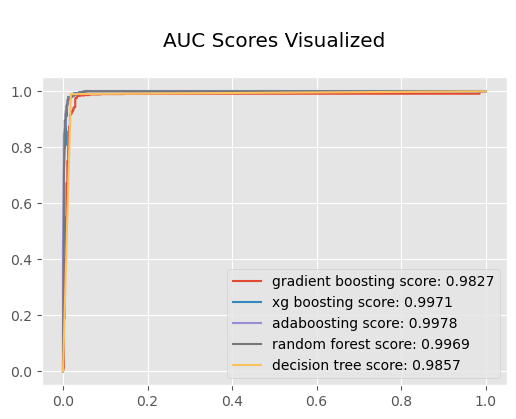

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, oob_score=False; total time=   0.7s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, 

In [153]:
plt.figure(figsize = (6,4))
plt.plot(gbc_fpr, gbc_tpr, label = f'gradient boosting score: {round(gbc_auc_score, 4)}')
plt.plot(xgc_fpr, xgc_tpr, label = f'xg boosting score: {round(xgc_auc_score, 4)}')
plt.plot(adc_fpr, adc_tpr, label = f'adaboosting score: {round(adc_auc_score,4)}')
plt.plot(rf_fpr, rf_tpr, label = f'random forest score: {round(rf_auc_score,4)}')
plt.plot(decision_tree_fpr, decision_tree_tpr, label = f'decision tree score: {round(decision_tree_auc_score,4)}')
plt.title('\nAUC Scores Visualized\n')
plt.legend()
plt.show()

##### best peformers based on auc score:
##### 1.  Adaboost
##### 2.  XgBoost
##### 3.  Random Forest
##### 4.  Decision Tree
##### 5.  Gradient Boost

####
#### LESSONS LEARNED THUS FAR
####
##### 1. Do not round up numbers because it can DRASTICALLY affect how models perceive to perform
##### 2. Train as many models as possible
##### 3. Use more than one evaluation metric
##### 4. Visualizing results/scores helps a lot in understanding model performance
####

####
#### HYPERPARAMETER TUNING
####
##### Having selected the top 5 performing models, I will hyper-tune their respective to see if I can further improve their performance. 

####

#### HYPER-TUNING ADABOOST MODEL

In [111]:
#setting the parameters options
ada_params = {
    'n_estimators': [50, 100, 200, 300, 350, 400],
    'learning_rate': [0.01, 0.1, 0.5, 0.7, 1],
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3), DecisionTreeClassifier(), RandomForestClassifier()],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [112]:
#importing grid search 
from sklearn.model_selection import GridSearchCV

In [113]:
#creating grid search model
adaboost_gridsearch = GridSearchCV(estimator = adc, param_grid=ada_params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

In [114]:
#ouputting model
adaboost_gridsearch

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=120,
                                                                           n_jobs=1,
                                                                           random_state=3),
                                          learning_rate=1.05, n_estimators=70,
                                          random_state=4),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(),
                                       RandomForestClassifier()],
                         'learning_rate': [0.01, 0.1, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 200, 300, 350, 400]},
             scoring='roc_auc', verbose=1)

In [115]:
#training the model
adaboost_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=120,
                                                                           n_jobs=1,
                                                                           random_state=3),
                                          learning_rate=1.05, n_estimators=70,
                                          random_state=4),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'estimator': [DecisionTreeClassifier(max_depth=1),
                                       DecisionTreeClassifier(max_depth=3),
                                       DecisionTreeClassifier(),
                                       RandomForestClassifier()],
                         'learning_rate': [0.01, 0.1, 0.5, 0.7, 1],
                         'n_estimators': [50, 100, 200, 300, 350, 400]},
             scoring='roc_auc', verbose=1)

In [126]:
#checking the best parameters
adaboost_gridsearch.best_params_

{'algorithm': 'SAMME.R',
 'estimator': DecisionTreeClassifier(max_depth=3),
 'learning_rate': 0.1,
 'n_estimators': 200}

In [127]:
#making predictions
adaboost_gridsearch_preds = gbc.predict(x_test)
adaboost_gridsearch_proba = gbc.predict_proba(x_test)[:,1]

#model accuracy
adaboost_gridsearch_accuracy = accuracy_score(y_test, adaboost_gridsearch_preds)

adaboost_gridsearch_fpr, adaboost_gridsearch_tpr, adaboost_gridsearch_thresholds = roc_curve(y_test, adaboost_gridsearch_proba)
adaboost_gridsearch_auc_score = auc(adaboost_gridsearch_fpr, adaboost_gridsearch_tpr)

#outputting auc score and accuracy of gridsearch Adaboost model vs original AdaBoost Model
print(f'AUC Score of GridSearch AdaBoost Classifier Model: {adaboost_gridsearch_auc_score}')
print(f'Accuracy Score of GridSearch AdaBoost Classifier Model: {adaboost_gridsearch_accuracy}')
print('\n\n')
print(f'AUC Score of Base AdaBoost Model: {adc_auc_score}')
print(f'Accuracy Score of Base AdaBoost Model: {adc_accuracy}')


AUC Score of GridSearch AdaBoost Classifier Model: 0.9827026157526322
Accuracy Score of GridSearch AdaBoost Classifier Model: 0.9734582357533177



AUC Score of Base AdaBoost Model: 0.9977622627998568
Accuracy Score of Base AdaBoost Model: 0.9797033567525371


##### *the gridsearch version of the adaboost classifier performing slightly worse than the original adaboost classifier could be a result of possible overfitting. On the positive, it could mean the model is stable*
#####
##### *Next steps: I will be comparing both models based on their precision, accuracy and f1 scores*

In [125]:
from sklearn.metrics import classification_report

original_adaboost_report = classification_report(y_test, adc_prediction)
gridsearch_adaboost_report = classification_report(y_test, adaboost_gridsearch_preds)

print(f'\nBase AdaBoost Model Classification Report:\n {original_adaboost_report}')
print(f'\n\n\nGridSearch AdaBoost Model Classification Report:\n {gridsearch_adaboost_report}')


Base AdaBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       483
           1       0.98      0.98      0.98       798

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281




GridSearch AdaBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       483
           1       0.98      0.98      0.98       798

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



##### *Interpretation: The GridSearch model doesn't significantly improve upon the base model in terms of the metrics provided. In fact, the GridSearch model slightly underperforms in precision for class 0. The minimal difference in accuracy and F1-score suggests that the base model might already be well-tuned for this dataset.*


####
#### HYPER-TUNING XGBOOST MODEL

In [136]:
#setting hyperparamter options
xgc_params = {
    'n_estimators': [50, 100, 150, 400],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.15, 0.2],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.7, 0.8],
    'gamma': [0, 0.1]
}

#creating grid search model
xgboost_gridsearch = GridSearchCV(estimator = xgc, param_grid=xgc_params, scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

In [137]:
#training the model
xgboost_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=180,
                                     n_jobs=1, num_parallel_tree=None,
                                     random_state=5, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1, 0.15, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 150, 400],
                         'subsample': [0.7, 0.8]},
             scoring='roc_auc', verbose=1)

In [139]:
#checking the best parameters
xgboost_gridsearch.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [140]:
#making predictions
xgboost_gridsearch_preds = gbc.predict(x_test)
xgboost_gridsearch_proba = gbc.predict_proba(x_test)[:,1]

#model accuracy
xgboost_gridsearch_accuracy = accuracy_score(y_test, xgboost_gridsearch_preds)

xgboost_gridsearch_fpr, xgboost_gridsearch_tpr, xgboost_gridsearch_thresholds = roc_curve(y_test, xgboost_gridsearch_proba)
xgboost_gridsearch_auc_score = auc(xgboost_gridsearch_fpr, xgboost_gridsearch_tpr)

#outputting auc score and accuracy of gridsearch Adaboost model vs original AdaBoost Model
print(f'AUC Score of GridSearch XGBoost Classifier Model: {xgboost_gridsearch_auc_score}')
print(f'Accuracy Score of GridSearch XGBoost Classifier Model: {xgboost_gridsearch_accuracy}')
print('\n\n')
print(f'AUC Score of Base XGBoost Classifier Model: {xgc_auc_score}')
print(f'Accuracy Score of Base XGBoost Classifier Model: {xgc_accuracy}')


AUC Score of GridSearch XGBoost Classifier Model: 0.9827026157526322
Accuracy Score of GridSearch XGBoost Classifier Model: 0.9734582357533177



AUC Score of Base XGBoost Classifier Model: 0.9971227239942506
Accuracy Score of Base XGBoost Classifier Model: 0.985167837626854


##### *the gridsearch version of the xgboost classifier performing slightly worse than the base xgboost classifier could be a result of possible overfitting. On the positive, it could mean the model is stable*
#####
##### *Next steps: I will be comparing both models based on their precision, accuracy and f1 scores*

In [141]:
from sklearn.metrics import classification_report

original_xgboost_report = classification_report(y_test, xgc_prediction)
gridsearch_xgboost_report = classification_report(y_test, xgboost_gridsearch_preds)

print(f'\nBase XGBoost Model Classification Report:\n {original_xgboost_report}')
print(f'\n\n\nGridSearch XGBoost Model Classification Report:\n {gridsearch_xgboost_report}')


Base XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       483
           1       0.98      0.99      0.99       798

    accuracy                           0.99      1281
   macro avg       0.99      0.98      0.98      1281
weighted avg       0.99      0.99      0.99      1281




GridSearch XGBoost Model Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       483
           1       0.98      0.98      0.98       798

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



##### *Interpretation: the differences are minor and the base model performs better across all metrics. I will stick with the base model for now*


###

####
#### HYPER-TUNING RANDOM FOREST MODEL

In [144]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False],
    'oob_score': [True, False]
}

rf_gridsearch = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, n_jobs=-1, verbose=2)

In [145]:
#training the model
rf_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits


/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200, oob_score=False; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, oob_score=True; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300, oob_score=True; total time=   0.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, oob_score=True; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, oob_score=False; total time=   0.2s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_sa

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, oob_score=True; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200, oob_score=False; total time=   0.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300, oob_score=False; total time=   0.8s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, oob_score=False; total time=   0.6s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, oob_score=True; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, oob_score=False; total time=   0.8s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, oob_score=False; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, oob_score=True; total time=   0.7s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300, oob_score=True; total time=   1.0s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=2, min_s

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, oob_score=False; total time=   0.6s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=100, oob_score=False; total time=   0.4s
[CV] END bootstrap=False, max_depth=None, max_features=auto, m

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200, oob_score=False; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, oob_score=False; total time=   0.4s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=200, oob_score=False; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, 

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, oob_score=False; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300, oob_score=False; total time=   0.8s
[CV] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1620 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message, FitFailedWarni

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=120, n_jobs=1,
                                              random_state=3),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300],
                         'oob_score': [True, False]},
             verbose=2)

In [146]:
#checking the best parameters
rf_gridsearch.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200,
 'oob_score': False}

In [147]:
#making predictions
rf_gridsearch_preds = gbc.predict(x_test)
rf_gridsearch_proba = gbc.predict_proba(x_test)[:,1]

#model accuracy
rf_gridsearch_accuracy = accuracy_score(y_test, xgboost_gridsearch_preds)

rf_gridsearch_fpr, rf_gridsearch_tpr, rf_gridsearch_thresholds = roc_curve(y_test, rf_gridsearch_proba)
rf_gridsearch_auc_score = auc(rf_gridsearch_fpr, rf_gridsearch_tpr)

#outputting auc score and accuracy of gridsearch Adaboost model vs original AdaBoost Model
print(f'AUC Score of GridSearch Random Forest Classifier Model: {rf_gridsearch_auc_score}')
print(f'Accuracy Score of GridSearch Random Forest Classifier Model: {rf_gridsearch_accuracy}')
print('\n\n')
print(f'AUC Score of Base Random Forest Classifier Model: {rf_auc_score}')
print(f'Accuracy Score of Base Random Forest Classifier Model: {rf_accuracy}')


AUC Score of GridSearch Random Forest Classifier Model: 0.9827026157526322
Accuracy Score of GridSearch Random Forest Classifier Model: 0.9734582357533177



AUC Score of Base Random Forest Classifier Model: 0.9969112740443241
Accuracy Score of Base Random Forest Classifier Model: 0.9828259172521467


In [149]:
from sklearn.metrics import classification_report

original_rf_report = classification_report(y_test, rf_prediction)
gridsearch_rf_report = classification_report(y_test, rf_gridsearch_preds)

print(f'\nBase Random Forest Classification Report:\n {original_rf_report}')
print(f'\n\n\nGridSearch Random Forest Classification Report:\n {gridsearch_rf_report}')


Base Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       483
           1       0.98      0.99      0.99       798

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281




GridSearch Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       483
           1       0.98      0.98      0.98       798

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



##### *Interpretation: the differences are minor and the base model performs better across all metrics. I will stick with the base model for now*


####

####
#### HYPER-TUNING DECISION TREE MODEL

In [156]:
dt_params = {
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

dt_gridsearch = GridSearchCV(estimator=dt, param_grid=dt_params, cv=5, n_jobs=-1, verbose=2)

In [157]:
#training the model
dt_gridsearch.fit(x_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [158]:
#checking the best parameters
dt_gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [159]:
#making predictions
dt_gridsearch_preds = gbc.predict(x_test)
dt_gridsearch_proba = gbc.predict_proba(x_test)[:,1]

#model accuracy
dt_gridsearch_accuracy = accuracy_score(y_test, dt_gridsearch_preds)

dt_gridsearch_fpr, dt_gridsearch_tpr, dt_gridsearch_thresholds = roc_curve(y_test, dt_gridsearch_proba)
dt_gridsearch_auc_score = auc(dt_gridsearch_fpr, dt_gridsearch_tpr)

#outputting auc score and accuracy of gridsearch Adaboost model vs original AdaBoost Model
print(f'AUC Score of GridSearch Decision Tree Classifier Model: {dt_gridsearch_auc_score}')
print(f'Accuracy Score of GridSearch Decision Tree Classifier Model: {dt_gridsearch_accuracy}')
print('\n\n')
print(f'AUC Score of Base Decision Tree Classifier Model: {decision_tree_auc_score}')
print(f'Accuracy Score of Base Decision Tree Classifier Model: {decision_tree_accuracy}')


AUC Score of GridSearch Decision Tree Classifier Model: 0.9827026157526322
Accuracy Score of GridSearch Decision Tree Classifier Model: 0.9734582357533177



AUC Score of Base Decision Tree Classifier Model: 0.9856706984853437
Accuracy Score of Base Decision Tree Classifier Model: 0.9867291178766588


In [161]:
from sklearn.metrics import classification_report

original_dt_report = classification_report(y_test, decision_tree_prediction)
gridsearch_dt_report = classification_report(y_test, dt_gridsearch_preds)

print(f'\nBase Random Forest Classification Report:\n {original_dt_report}')
print(f'\n\n\nGridSearch Random Forest Classification Report:\n {gridsearch_dt_report}')


Base Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       483
           1       0.99      0.99      0.99       798

    accuracy                           0.99      1281
   macro avg       0.99      0.99      0.99      1281
weighted avg       0.99      0.99      0.99      1281




GridSearch Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       483
           1       0.98      0.98      0.98       798

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



##### *Interpretation: the differences are minor and the base model performs better across all metrics. I will stick with the base model for now*


####

####
#### HYPER-TUNING GRADIENT BOOSTING MODEL (with Randomized Search)

In [192]:
from sklearn.model_selection import RandomizedSearchCV

gb_params1 = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}


gb_randomsearch = RandomizedSearchCV(estimator=gbc, param_distributions=gb_params1, n_iter=10, cv=5, n_jobs=-1, verbose=2, random_state=30)

In [193]:
#training the model
gb_randomsearch.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=GradientBoostingClassifier(learning_rate=1.5,
                                                        random_state=6),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=30, verbose=2)

In [194]:
#checking the best parameters
gb_randomsearch.best_params_

{'subsample': 0.8,
 'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 6,
 'learning_rate': 0.1}

In [201]:
#making predictions
gb_randomsearch_preds = gbc.predict(x_test)
gb_randomsearch_proba = gbc.predict_proba(x_test)[:,1]

#model accuracy
gb_randomsearch_accuracy = accuracy_score(y_test, gb_randomsearch_preds)

gb_randomsearch_fpr, gb_randomsearch_tpr, gb_randomsearch_thresholds = roc_curve(y_test, gb_randomsearch_proba)
gb_randomsearch_auc_score = auc(gb_randomsearch_fpr, gb_randomsearch_tpr)

#outputting auc score and accuracy of gridsearch Adaboost model vs original AdaBoost Model
print(f'AUC Score of RandomSearch Gradient Boosting Classifier Model: {gb_randomsearch_auc_score}')
print(f'Accuracy Score of RandomSearh Gradient Boosting Classifier Model: {gb_randomsearch_accuracy}')
print('\n\n')
print(f'AUC Score of Base Gradient Boosting Classifier Model: {gbc_auc_score}')
print(f'Accuracy Score of Base Gradient Boosting Classifier Model: {gbc_accuracy}')


AUC Score of RandomSearch Gradient Boosting Classifier Model: 0.9827026157526322
Accuracy Score of RandomSearh Gradient Boosting Classifier Model: 0.9734582357533177



AUC Score of Base Gradient Boosting Classifier Model: 0.9827026157526322
Accuracy Score of Base Gradient Boosting Classifier Model: 0.9734582357533177


In [196]:
from sklearn.metrics import classification_report

original_gb_report = classification_report(y_test, gbc_prediction)
randomsearch_gb_report = classification_report(y_test, gb_randomsearch_preds)

print(f'\nBase Gradient Boosting Classification Report:\n {original_gb_report}')
print(f'\n\n\RandomizedSearch Gradient Boosting Classification Report:\n {randomsearch_gb_report}')


Base Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       483
           1       0.98      0.98      0.98       798

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



\RandomizedSearch Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       483
           1       0.98      0.98      0.98       798

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281



##### *there is no difference in the results for the base and randomized search versions of gradient boosting. I will proceed to try gridsearch*
#####
##### GRADIENT BOOSTING TUNING WITH GRIDSEARCH
######

In [197]:
gb_params2 = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0],
    'max_features': ['sqrt', 'log2']
}

gb_grid = GridSearchCV(estimator=gbc, param_grid=gb_params2, cv=5, n_jobs=-1, verbose=2)

In [198]:
#train the gridsearch version
gb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=1.5,
                                                  random_state=6),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 4],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100], 'subsample': [0.8, 1.0]},
             verbose=2)

In [199]:
#checking the best parameters
gb_grid.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100,
 'subsample': 1.0}

In [203]:
#making predictions
gb_grid_preds = gbc.predict(x_test)
gb_grid_proba = gbc.predict_proba(x_test)[:,1]

#model accuracy
gb_grid_accuracy = accuracy_score(y_test, gb_grid_preds)

gb_grid_fpr, gb_grid_tpr, gb_grid_thresholds = roc_curve(y_test, gb_grid_proba)
gb_grid_auc_score = auc(gb_grid_fpr, gb_grid_tpr)

#outputting auc score and accuracy of gridsearch Adaboost model vs original AdaBoost Model
print(f'AUC Score of GridSearch Gradient Boosting Classifier Model: {gb_grid_auc_score}')
print(f'Accuracy Score of GridSearch Gradient Boosting Classifier Model: {gb_grid_accuracy}')
print('\n\n')
print(f'AUC Score of Base Gradient Boosting Classifier Model: {gbc_auc_score}')
print(f'Accuracy Score of Base Gradient Boosting Classifier Model: {gbc_accuracy}')


AUC Score of GridSearch Gradient Boosting Classifier Model: 0.9827026157526322
Accuracy Score of GridSearch Gradient Boosting Classifier Model: 0.9734582357533177



AUC Score of Base Gradient Boosting Classifier Model: 0.9827026157526322
Accuracy Score of Base Gradient Boosting Classifier Model: 0.9734582357533177


##
### comparing the AUC Scores of the hyperparameter-tuned modes VS the base models
##

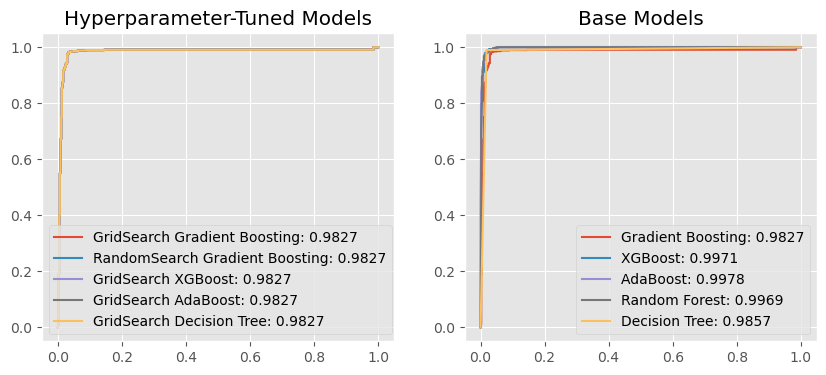

In [219]:
plt.figure(figsize=(10, 4))

# Plotting hyperparameter-tuned models
plt.subplot(1, 2, 1)
plt.plot(gb_grid_fpr, gb_grid_tpr, label=f'GridSearch Gradient Boosting: {round(gb_grid_auc_score, 4)}')
plt.plot(gb_randomsearch_fpr, gb_randomsearch_tpr, label=f'RandomSearch Gradient Boosting: {round(gb_randomsearch_auc_score, 4)}')
plt.plot(xgboost_gridsearch_fpr, xgboost_gridsearch_tpr, label=f'GridSearch XGBoost: {round(xgboost_gridsearch_auc_score, 4)}')
plt.plot(adaboost_gridsearch_fpr, adaboost_gridsearch_tpr, label=f'GridSearch AdaBoost: {round(adaboost_gridsearch_auc_score, 4)}')
plt.plot(dt_gridsearch_fpr, dt_gridsearch_tpr, label=f'GridSearch Decision Tree: {round(dt_gridsearch_auc_score, 4)}')
plt.title('Hyperparameter-Tuned Models')
plt.legend()

# Plotting base models
plt.subplot(1, 2, 2)
plt.plot(gbc_fpr, gbc_tpr, label=f'Gradient Boosting: {round(gbc_auc_score, 4)}')
plt.plot(xgc_fpr, xgc_tpr, label=f'XGBoost: {round(xgc_auc_score, 4)}')
plt.plot(adc_fpr, adc_tpr, label=f'AdaBoost: {round(adc_auc_score, 4)}')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest: {round(rf_auc_score, 4)}')
plt.plot(decision_tree_fpr, decision_tree_tpr, label=f'Decision Tree: {round(decision_tree_auc_score, 4)}')
plt.title('Base Models')
plt.legend()

plt.show()


##### *The hyperameter-tuned models seem to peak at 0.9827*
####

#### comparing classification reports of the top-performing models

In [226]:
c_gradientboosting = classification_report(y_test, gbc_prediction)
c_xgboost = classification_report(y_test, xgc_prediction)
c_ada = classification_report(y_test, adc_prediction)
c_rforest = classification_report(y_test, rf_prediction)
c_dtree = classification_report(y_test, decision_tree_prediction)

print(f'gradient boosting:\n {c_gradientboosting}')
print('\n\n')
print(f'xgboost:\n {c_xgboost}')
print('\n\n')
print(f'adaboost:\n {c_ada}')
print('\n\n')
print(f'random forest:\n {c_rforest}')
print('\n\n')
print(f'decision tree:\n {c_dtree}')

gradient boosting:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       483
           1       0.98      0.98      0.98       798

    accuracy                           0.97      1281
   macro avg       0.97      0.97      0.97      1281
weighted avg       0.97      0.97      0.97      1281




xgboost:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       483
           1       0.98      0.99      0.99       798

    accuracy                           0.99      1281
   macro avg       0.99      0.98      0.98      1281
weighted avg       0.99      0.99      0.99      1281




adaboost:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97       483
           1       0.98      0.98      0.98       798

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98    

#### SELECTING THE BEST MODEL

##### The top model based on the classification report metrics, particularly accuracy, precision, recall, and F1-score, is XGBoost. It has the highest accuracy (0.99) and the most balanced precision and recall across both classes, making it the top-performing model overall.




####
#### RANKING THE MODELS

##### 1. XGBoost - Top performance in classification report and 2nd in AUC score


##### 2. AdaBoost - 3rd in classification report but 1st in AUC score


##### 3. Random Forest - 2nd/3rd in classification report and 3rd in AUC score


##### 4. Decision Tree - Tied for 1st in classification report but 4th in AUC score


##### 5. Gradient Boosting - Lowest performance in classification report and 5th in AUC score
####

#### FINAL CROSS-VALIDATION

In [236]:
# Assuming X and y are your features and labels
final_cv_scores = cross_val_score(xgc, x, y, cv=10, scoring='roc_auc')

# Display the results
print("Final Cross-Validation AUC Scores:", final_cv_scores)
print("Mean Cross-Validation AUC Score:", final_cv_scores.mean())

Final Cross-Validation AUC Scores: [0.99743147 0.99974315 0.99824873 0.99775837 0.99901929 0.99922944
 0.99712322 0.99790356 0.99743769 0.99927341]
Mean Cross-Validation AUC Score: 0.9983168325625884


#### FEATURE IMPORTANACE ANALYSIS

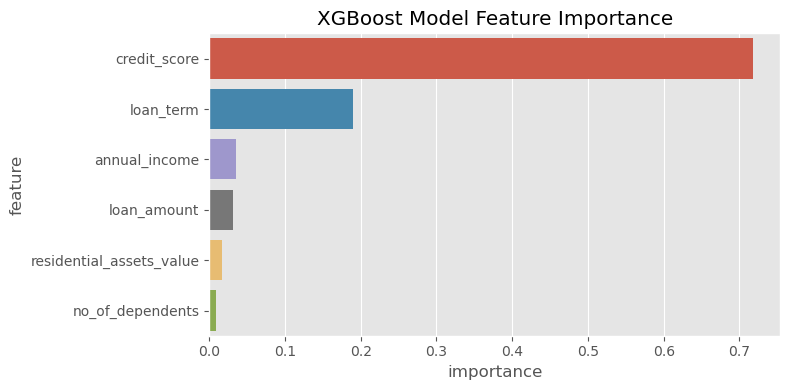

In [249]:
# Get feature importances
importances = xgc.feature_importances_
feature_names = x.columns.tolist()  # Convert to list to ensure compatibility

# Ensure lengths match
min_length = min(len(importances), len(feature_names))
importances = importances[:min_length]
feature_names = feature_names[:min_length]

# Create a dataframe of feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# Visualize
plt.figure(figsize=(8, 4))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('XGBoost Model Feature Importance')
plt.tight_layout()
plt.show()

##### *FEATURE IMPORTANT INSIGHTS : It's interesting that credit score has the most impact on loan approval. This aligns well with real-world lending practices, where credit score is often a crucial factor in determining creditworthiness.*

##### COMPARING THE AVERGAE CREDIT SCORE OF APPROVED VS UNAPPROVED APPLICANTS

In [256]:
loan_data.groupby('status')['credit_score'].mean()

status
0    429.468072
1    703.461973
Name: credit_score, dtype: float64

#####
##### *Wow! That is a big difference! Almost 300 points separate individuals who get their loans approved vs those who do not get their loans approved.*
##### *The feature importance has thought me just how CRUCIAL credit scores are in getting a loan. The second factor which is the loan term is 3x less important in this context which is shocking.*
##### *Annual income, which I presumed would be a major factor is in itself, about 10x less important than credit score*
##### *In a nutshell, this emphasizes how important credit scores in the financial world. I now realize why people stress the importance of building your credit and making sure you have good credit standing at all times*
######

#